In [1]:
## Machine Learning Online Class - Exercise 4 Neural Network Learning

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoidGradient.m
#     randInitializeWeights.m
#     nnCostFunction.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import numpy as np
import scipy.io as scio
from scipy import optimize
import sys
sys.path.append(r"..")
import lib.plotting as libplt
import importlib
importlib.reload(libplt)


## Setup the parameters you will use for this exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

# 1. 加载和可视化数据

Loading and Visualizing Data ...

m, n: 100, 400
display_rows:10
display_cols:10


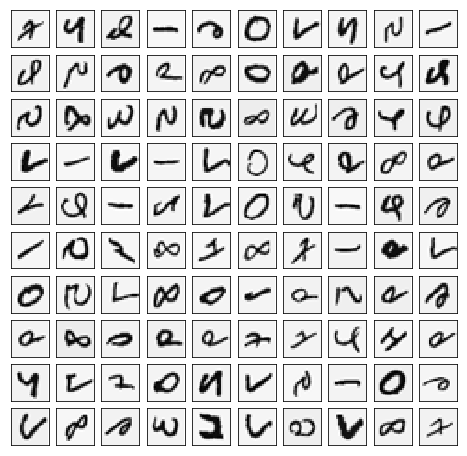

In [2]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

data = scio.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
m = len(X);

# Randomly select 100 data points to display
sel = np.random.permutation(range(m))
sel = sel[:100]

libplt.displayData(X[sel, :])

# 2. 加载参数

In [3]:
## ================ Part 2: Loading Parameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
param = scio.loadmat('ex4weights.mat');
Theta1 = param['Theta1']
Theta2 = param['Theta2']

# Unroll parameters 
#nn_params = [Theta1(:) ; Theta2(:)];
nn_params = np.append(Theta1.ravel(),Theta2.ravel(),axis=None)


Loading Saved Neural Network Parameters ...



# 3.计算Cost(前向传播)

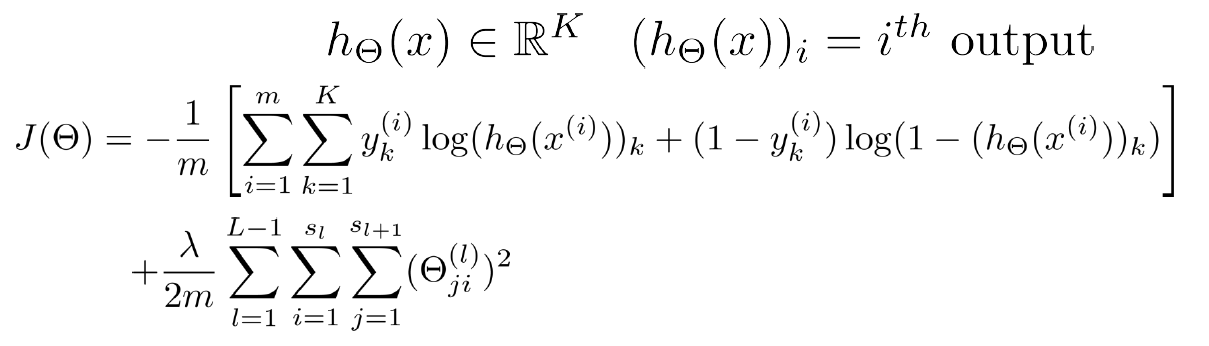

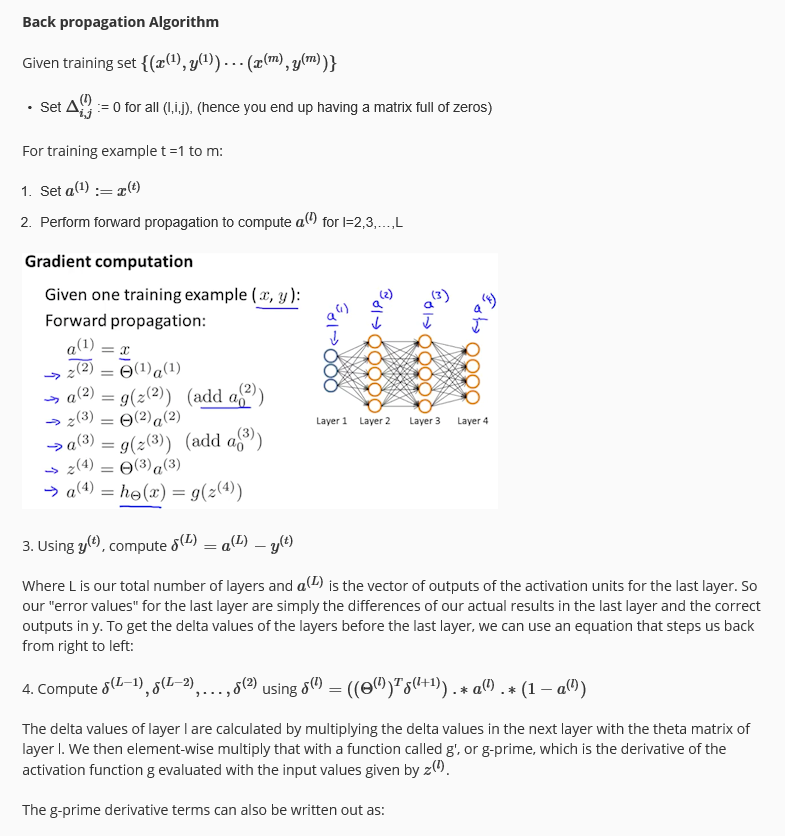
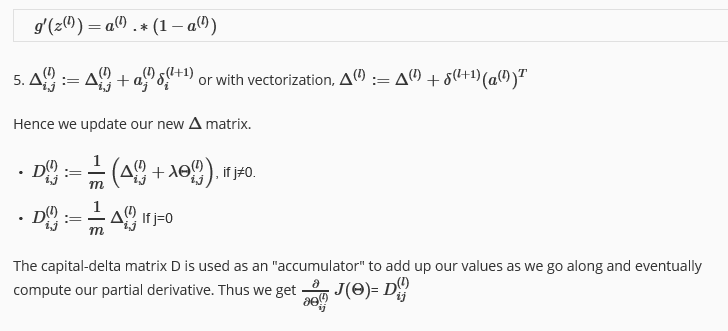

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def fill_vector(arr):
    number = arr[-1] # get the number in the last element
    arr[int(number)-1] = 1
    return arr

In [6]:
def sigmoidGradient(z):
    #SIGMOIDGRADIENT returns the gradient of the sigmoid function
    #evaluated at z
    #   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
    #   evaluated at z. This should work regardless if z is a matrix or a
    #   vector. In particular, if z is a vector or matrix, you should return
    #   the gradient for each element.

    grad = np.zeros(z.shape);

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the gradient of the sigmoid function evaluated at
    #               each value of z (z can be a matrix, vector or scalar).
    

    g_z = 1/(1+np.exp(-z))
    
    grad = g_z*(1-g_z) # element-wise multiply

    return grad

In [7]:
def nnCostFunction(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #NNCOSTFUNCTION Implements the neural network cost function for a two layer
    #neural network which performs classification
    #   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
    #   X, y, lambda) computes the cost and gradient of the neural network. The
    #   parameters for the neural network are "unrolled" into the vector
    #   nn_params and need to be converted back into the weight matrices. 
    # 
    #   The returned parameter grad should be a "unrolled" vector of the
    #   partial derivatives of the neural network.
    #

    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = len(X)

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the code by working through the
    #               following parts.
    #
    # Part 1: Feedforward the neural network and return the cost in the
    #         variable J. After implementing Part 1, you can verify that your
    #         cost function computation is correct by verifying the cost
    #         computed in ex4.m
    #
    # Part 2: Implement the backpropagation algorithm to compute the gradients
    #         Theta1_grad and Theta2_grad. You should return the partial derivatives of
    #         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
    #         Theta2_grad, respectively. After implementing Part 2, you can check
    #         that your implementation is correct by running checkNNGradients
    #
    #         Note: The vector y passed into the function is a vector of labels
    #               containing values from 1..K. You need to map this vector into a 
    #               binary vector of 1's and 0's to be used with the neural network
    #               cost function.
    #
    #         Hint: We recommend implementing backpropagation using a for-loop
    #               over the training examples if you are implementing it for the 
    #               first time.
    #
    # Part 3: Implement regularization with the cost function and gradients.
    #
    #         Hint: You can implement this around the code for
    #               backpropagation. That is, you can compute the gradients for
    #               the regularization separately and then add them to Theta1_grad
    #               and Theta2_grad from Part 2.
    #
    #need to add the column of 1's to the X matrix.
    X = np.column_stack((np.ones((m,1)),X))
    
    A_2 = sigmoid(X.dot(Theta1.T)) #5000*401,401*25->5000*25
    A_2 = np.column_stack((np.ones((len(A_2),1)), A_2))
    h = sigmoid(A_2.dot(Theta2.T)) #5000*26,26*10->5000*10
    
    #convert y(i) into 10 element vector
    y_matrix=np.zeros((m,len(Theta2)))
    #avoid using for loop
    y_matrix = np.column_stack((y_matrix,y)) # add the class label to the last column
    y_matrix = np.apply_along_axis(fill_vector,axis=1,arr=y_matrix)
    y_matrix = y_matrix[:,:-1] #remove the last column->5000*10
    
    J_vec = np.zeros((m,1))
    for i in range(m):
        J_vec[i] = -(y_matrix[i].T.dot(np.log(h[i])+(1-y_matrix[i]).T.dot(np.log(1-h[i]))))
        #print (J_vec[i])
    
    #the assumption here is there're 3 layers
    L = 3
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    
    regular_vec = np.zeros((L-1,1))
    #regular_item = 0
    
    for l in range(L-1):
        regular_vec[l] = np.sum(Thetas_reg[l]*Thetas_reg[l]) #element wise multiply
        #regular_item += np.sum(Thetas[l]*Thetas[l]) #element wise multiply
        
        
    J = np.average(J_vec)+0.5*plambda*np.sum(regular_vec)/m
    #J = np.average(J_vec)+0.5*plambda*regular_item/m


    return J


In [29]:
def nnGradient(nn_params, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    # use for fmin_cg function as fprime
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = len(X)
    
    #the assumption here is there're 3 layers
    L = 3

    # You need to return the following variables correctly 
    
    #Theta1_grad = np.zeros(Theta1.shape)
    #Theta2_grad = np.zeros(Theta2.shape)
    
    X = np.column_stack((np.ones((m,1)),X))

    #convert y(i) into 10 element vector
    y_matrix=np.zeros((m,len(Theta2)))
    #avoid using for loop
    y_matrix = np.column_stack((y_matrix,y)) # add the class label to the last column
    y_matrix = np.apply_along_axis(fill_vector,axis=1,arr=y_matrix)
    y_matrix = y_matrix[:,:-1] #remove the last column->5000*10
    
    #grad = [Theta1_grad[:],Theta2_grad[:]]
    grad = [None] * 2
    
    #a_list = [None]*L # a1,a2,a3
    Thetas = [Theta1,Theta2]
    
    #DELTA = [None]*(L-1) #DELTA_1, DELTA_2, DELTA_3  len(a[l+1])*len(a[l])
    DELTA1 = np.zeros((hidden_layer_size, input_layer_size + 1)) # DELTA1
    DELTA2 = np.zeros((num_labels, hidden_layer_size + 1)) # DELTA2
    
    
    for i in range(m):
        a1 = X[i].reshape(-1,1) #X already added the bias unit
        g_a1 = sigmoid(Theta1.dot(a1))
        a2 = np.row_stack((np.ones(1),g_a1))
        a3 = sigmoid(Theta2.dot(a2))
        
        print("a1~a3")
        print(a1)
        print(a2)
        print(a3)
      
        delta = [None]* (L-1) #delta_L，delta_L-1...delta_2
        # need to use vectorized y[i]
        delta3 = a3 - y_matrix[i].reshape(-1,1)
        
        #delta2 = Theta2.T.dot(delta3)*a2*(1-a2)
        #delta2 = delta2[1:] #注意δ是不包含偏置项的，公式中如何体现的？
        #g'(z) is not equal to a.*(1-a). It is more correct to say that:
        #g'(z) = g(z) .* (1 - g(z))
        # 但是根据测试用例，结果是一样的？
        #delta2 = Theta2[:,1:].T.dot(delta3)*g_a1*(1-g_a1)
        #delta2 = Theta2[:,1:].T.dot(delta3)*sigmoidGradient(a1[1:])  Theta2[:,1:].T.dot(delta3): (3*5).T*3*1->5*1 a1[1:] 3维
        print("delta2,delta3")

        print(delta2)
        print(delta3)
            
        DELTA1 += delta2.dot(a1.T)
        DELTA2 += delta3.dot(a2.T)
        
        print(DELTA1)
        print(DELTA2)
            
    DELTA = [DELTA1, DELTA2]
    Thetas_reg = [Theta1[:,1:],Theta2[:,1:]]
    for l in range(L-1):
        #print("l:%s"%l)
        grad[l] = DELTA[l]/m 
        #print(grad[l].shape)
        #print(Thetas_reg[l].shape)
        ''' if l!=L-2:
            grad[l][1:,1:] += plambda * Thetas_reg[l]
        else:'''
        grad[l][:,1:] += plambda * Thetas_reg[l]
    
    #print(grad[0].shape)
    #print(grad[1].shape)
    grad = np.append(grad[0].ravel(),grad[1].ravel(),axis=None)
    
    return grad

Test Case for gradient

In [30]:
il = 2;              # input layer
hl = 2;              # hidden layer
nl = 4;              # number of labels
nn = np.array(range(1,19,1)) / 10;  # nn_params
X = np.cos([[1, 2] , [3, 4] , [5, 6]]);
y = np.array([4, 2, 3]).reshape(-1,1)
plambda = 4;
J = nnCostFunction(nn, il, hl, nl, X, y, plambda)
grad = nnGradient(nn, il, hl, nl, X, y, plambda)

a1~a3
[[ 1.        ]
 [ 0.54030231]
 [-0.41614684]]
[[ 1.        ]
 [ 0.52079211]
 [ 0.60359405]]
[[ 0.84022033]
 [ 0.90864356]
 [ 0.94952578]
 [ 0.97266351]]
delta2,delta3
[[ 0.73735978]
 [ 0.77083949]]
[[ 0.84022033]
 [ 0.90864356]
 [ 0.94952578]
 [-0.02733649]]
[[ 0.73735978  0.39839719 -0.30684994]
 [ 0.77083949  0.41648635 -0.32078241]]
[[ 0.84022033  0.43758011  0.50715199]
 [ 0.90864356  0.4732144   0.54845185]
 [ 0.94952578  0.49450553  0.57312811]
 [-0.02733649 -0.01423663 -0.01650014]]
a1~a3
[[ 1.        ]
 [-0.9899925 ]
 [-0.65364362]]
[[ 1.        ]
 [ 0.42700248]
 [ 0.38055754]]
[[ 0.79964927]
 [ 0.87284729]
 [ 0.9219139 ]
 [ 0.95306448]]
delta2,delta3
[[ 0.83451052]
 [ 0.86407831]]
[[ 0.79964927]
 [-0.12715271]
 [ 0.9219139 ]
 [ 0.95306448]]
[[ 1.5718703  -0.42776197 -0.85232242]
 [ 1.6349178  -0.43894469 -0.88558169]]
[[ 1.6398696   0.77903233  0.81146455]
 [ 0.78149085  0.41891987  0.50006292]
 [ 1.87143968  0.88816505  0.9239694 ]
 [ 0.92572799  0.39272427  0.34619573]

In [31]:
print(J)
print(grad)

17.8862911739
[ 0.78845078  0.73243963  1.16985182  0.76826442  1.91702455  2.31920427
  0.83527896  3.63558376  4.08802066  0.57023465  4.72839357  5.20010757
  0.61176679  5.88871394  6.29891154  0.63586941  7.13036012  7.56204858]


In [40]:
np.cos(np.array([[1, 2] , [3, 4] , [5, 6]]))

array([[ 0.54030231, -0.41614684],
       [-0.9899925 , -0.65364362],
       [ 0.28366219,  0.96017029]])

In [93]:
Theta1 = np.reshape(nn[:2*3], 
                     (2,3))
Theta2 = np.reshape(nn[2*3:],(4,3))

In [94]:
A1 = np.column_stack((np.ones((3,1)),X))
g_a1=sigmoid(Theta1.dot(A1[0].reshape(-1,1)))


In [95]:
g_a1

array([[ 0.52079211],
       [ 0.60359405]])

In [96]:
a2 = np.row_stack((np.ones(1),g_a1))
g_a2 = sigmoid(Theta2.dot(a2.reshape(-1,1)))

In [97]:
a2

array([[ 1.        ],
       [ 0.52079211],
       [ 0.60359405]])

In [92]:
print(J)
print(grad)

17.8862911739
[ 0.78845078  0.73243963  1.16985182  0.76826442  1.91702455  2.31920427
  0.83527896  3.63558376  4.08802066  0.57023465  4.72839357  5.20010757
  0.61176679  5.88871394  6.29891154  0.63586941  7.13036012  7.56204858]


In [104]:
a1 = np.array([1,0.24982,0.24828])
z1 = sigmoid(Theta1.dot(a1))
z1

array([ 0.55587762,  0.66237096])

In [106]:
Theta2

array([[ 0.7,  0.8,  0.9],
       [ 1. ,  1.1,  1.2],
       [ 1.3,  1.4,  1.5],
       [ 1.6,  1.7,  1.8]])

In [105]:
a2 =  np.array([1.00000,   0.51350 ,  0.54151])
z2 = sigmoid(Theta2.dot(a2))
z2

array([ 0.83176092,  0.90155846,  0.94433687,  0.96916152])

In [31]:
J = nnCostFunction(nn, il, hl, nl, X, y, 0)
grad = nnGradient(nn, il, hl, nl, X, y, 0)

In [337]:
test = np.array([1,2,3]).reshape(-1,1)
np.row_stack((np.ones(1),test))

array([[ 1.],
       [ 1.],
       [ 2.],
       [ 3.]])

In [5]:
import numpy as np
np.array(range(18))/10

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7])

In [339]:
Theta1.shape

(25, 401)

In [9]:
## ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.m to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.
#
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
plambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.287629)\n'%J);


Feedforward Using Neural Network ...

Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



# 4. 实现正则化

In [10]:
## =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#

print('\nChecking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (we set this to 1 here).
plambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, plambda);

print('Cost at parameters (loaded from ex4weights): %f '
         '\n(this value should be about 0.383770)\n'%J);


Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



# 5. Sigmoid 梯度

In [11]:
## ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.m file.
#

print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]));
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
print(g)


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[ 0.19661193  0.23500371  0.25        0.23500371  0.19661193]


# 6. 初始化参数

In [12]:
def randInitializeWeights(L_in, L_out):
    #RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
    #incoming connections and L_out outgoing connections
    #   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
    #   of a layer with L_in incoming connections and L_out outgoing 
    #   connections. 
    #
    #   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
    #   the first column of W handles the "bias" terms
    #

    # You need to return the following variables correctly 
    #W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Initialize W randomly so that we break the symmetry while
    #               training the neural network.
    #
    # Note: The first column of W corresponds to the parameters for the bias unit
    #

    return W

In [13]:
## ================ Part 6: Initializing Pameters ================
#  In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.m)

print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

# Unroll parameters
#initial_nn_params = [initial_Theta1, initial_Theta2]
initial_nn_params = np.append(initial_Theta1.ravel(), initial_Theta2.ravel(), axis = None)


Initializing Neural Network Parameters ...



# 7. 实现反向传播

In [14]:
def debugInitializeWeights(fan_out, fan_in):
    #DEBUGINITIALIZEWEIGHTS Initialize the weights of a layer with fan_in
    #incoming connections and fan_out outgoing connections using a fixed
    #strategy, this will help you later in debugging
    #   W = DEBUGINITIALIZEWEIGHTS(fan_in, fan_out) initializes the weights 
    #   of a layer with fan_in incoming connections and fan_out outgoing 
    #   connections using a fix set of values
    #
    #   Note that W should be set to a matrix of size(1 + fan_in, fan_out) as
    #   the first row of W handles the "bias" terms
    #

    # Set W to zeros
    W = np.zeros((fan_out, 1 + fan_in))

    # Initialize W using "sin", this ensures that W is always of the same
    # values and will be useful for debugging
    W = np.sin(range(W.size)).reshape(W.shape)
    return W

In [15]:
#def computeNumericalGradient(J, theta): # 怎样实现原MATLAB代码中函数句柄？
def computeNumericalGradient(J, theta, 
                                   input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda):
    #COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
    #and gives us a numerical estimate of the gradient.
    #   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
    #   gradient of the function J around theta. Calling y = J(theta) should
    #   return the function value at theta.

    # Notes: The following code implements numerical gradient checking, and 
    #        returns the numerical gradient.It sets numgrad(i) to (a numerical 
    #        approximation of) the partial derivative of J with respect to the 
    #        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
    #        be the (approximately) the partial derivative of J with respect 
    #        to theta(i).)
    #                

    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    e = 1e-4;
    for p in range(theta.size):
    
        # Set perturbation vector
        perturb[p] = e;
        loss1 = J(theta - perturb,input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda)
        loss2 = J(theta + perturb,input_layer_size, 
                                   hidden_layer_size, 
                                   num_labels, 
                                   X, y, plambda)
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e);
        perturb[p] = 0
    

    return numgrad


In [16]:
def checkNNGradients(plambda=0):
    #CHECKNNGRADIENTS Creates a small neural network to check the
    #backpropagation gradients
    #   CHECKNNGRADIENTS(lambda) Creates a small neural network to check the
    #   backpropagation gradients, it will output the analytical gradients
    #   produced by your backprop code and the numerical gradients (computed
    #   using computeNumericalGradient). These two gradient computations should
    #   result in very similar values.
    #
    

    input_layer_size = 3;
    hidden_layer_size = 5;
    num_labels = 3;
    m = 5;

    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size);
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size);
    # Reusing debugInitializeWeights to generate X
    X  = debugInitializeWeights(m, input_layer_size - 1);
    y  = 1 + np.mod(range(m), num_labels).T

    # Unroll parameters
    nn_params = np.append(Theta1.ravel(), Theta2.ravel(), axis = None)

    # Short hand for cost function
    #costFunc = @(p) nnCostFunction(p, input_layer_size, hidden_layer_size, \
     #                              num_labels, X, y, lambda);

    cost = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    grad = nnGradient(nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    numgrad = computeNumericalGradient(nnCostFunction, nn_params, input_layer_size, hidden_layer_size, 
                                  num_labels, X, y, plambda)
    
    #unroll grad， work for 3-layer NN only
    #grad = np.append(grad[0].ravel(),grad[1].ravel(),axis=None)

    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar. 
    #print([numgrad, grad]);
    print("numgrad:")
    print(numgrad)
    print("grad:")
    print(grad)
    
    print('The above two columns you get should be very similar.\n  \
             (Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n')

    # Evaluate the norm of the difference between two solutions.  
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    # in computeNumericalGradient.m, then diff below should be less than 1e-9
    
    diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)

    print('If your backpropagation implementation is correct, then \n  \
             the relative difference will be small (less than 1e-9). \n  \
             \nRelative Difference: %g\n'%diff)


In [24]:
## =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.m to return the partial
#  derivatives of the parameters.
#
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()



Checking Backpropagation... 

a1~a3
[[ 1.        ]
 [ 0.        ]
 [ 0.84147098]
 [ 0.90929743]]
[[ 1.        ]
 [ 0.70960522]
 [ 0.40262816]
 [ 0.40667976]
 [ 0.70853912]
 [ 0.31355435]]
[[ 0.5457994 ]
 [ 0.51342623]
 [ 0.47987188]]
delta2,delta3
[[ 0.03229953]
 [ 0.13717352]
 [ 0.11088555]
 [-0.01522635]
 [-0.11606169]]
[[-0.4542006 ]
 [ 0.51342623]
 [ 0.47987188]]
[[ 0.03229953  0.          0.02717912  0.02936988]
 [ 0.13717352  0.          0.11542753  0.12473153]
 [ 0.11088555  0.          0.09330697  0.10082795]
 [-0.01522635  0.         -0.01281253 -0.01384528]
 [-0.11606169  0.         -0.09766254 -0.10553459]]
[[-0.4542006  -0.32230312 -0.18287395 -0.18471419 -0.3218189  -0.14241658]
 [ 0.51342623  0.36432993  0.20671986  0.20880005  0.36378257  0.16098703]
 [ 0.47987188  0.34051959  0.19320993  0.19515418  0.340008    0.15046592]]
a1~a3
[[ 1.        ]
 [ 0.14112001]
 [-0.7568025 ]
 [-0.95892427]]
[[ 1.        ]
 [ 0.33076357]
 [ 0.21237576]
 [ 0.91820074]
 [ 0.13580835]
 [ 0.

# 8. 实现正则化

In [26]:
## =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.
#

print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
plambda = 3;
checkNNGradients(plambda);

# Also output the costFunction debugging values
debug_J = nnCostFunction(nn_params, input_layer_size, 
                          hidden_layer_size, num_labels, X, y, plambda);

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f \
      \n(for lambda = 3, this value should be about 0.576051)\n\n'%(plambda, debug_J))


Checking Backpropagation (w/ Regularization) ... 

a1~a3
[[ 1.        ]
 [ 0.        ]
 [ 0.84147098]
 [ 0.90929743]]
[[ 1.        ]
 [ 0.70960522]
 [ 0.40262816]
 [ 0.40667976]
 [ 0.70853912]
 [ 0.31355435]]
[[ 0.5457994 ]
 [ 0.51342623]
 [ 0.47987188]]
delta2,delta3
[[ 0.03229953]
 [ 0.13717352]
 [ 0.11088555]
 [-0.01522635]
 [-0.11606169]]
[[-0.4542006 ]
 [ 0.51342623]
 [ 0.47987188]]
[[ 0.03229953  0.          0.02717912  0.02936988]
 [ 0.13717352  0.          0.11542753  0.12473153]
 [ 0.11088555  0.          0.09330697  0.10082795]
 [-0.01522635  0.         -0.01281253 -0.01384528]
 [-0.11606169  0.         -0.09766254 -0.10553459]]
[[-0.4542006  -0.32230312 -0.18287395 -0.18471419 -0.3218189  -0.14241658]
 [ 0.51342623  0.36432993  0.20671986  0.20880005  0.36378257  0.16098703]
 [ 0.47987188  0.34051959  0.19320993  0.19515418  0.340008    0.15046592]]
a1~a3
[[ 1.        ]
 [ 0.14112001]
 [-0.7568025 ]
 [-0.95892427]]
[[ 1.        ]
 [ 0.33076357]
 [ 0.21237576]
 [ 0.91820074]

In [421]:
## =================== Part 8: Training NN ===================
#  You have now implemented all the code necessary to train a neural 
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#
from scipy import optimize
print('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
#options = optimset('MaxIter', 50);

#  You should also try different values of lambda
plambda = 1;

# Create "short hand" for the cost function to be minimized
'''costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);'''

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
nn_params = optimize.fmin_cg(nnCostFunction, initial_nn_params, fprime = nnGradient, args = (input_layer_size, 
                                  hidden_layer_size, num_labels,X, y, plambda), maxiter = 400);
#nn_params = optimize.minimize(nnCostFunction, initial_nn_params, args = (input_layer_size, 
 #                                  hidden_layer_size, num_labels,X, y, plambda), 
 #                             method='TNC', jac=True, options = {'maxiter':250});

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], 
                     (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], 
                     (num_labels, (hidden_layer_size + 1)))


Training Neural Network... 

         Current function value: 3.470673
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96


# 9 可视化权重值


Visualizing Neural Network... 

m, n: 25, 400
display_rows:5
display_cols:5


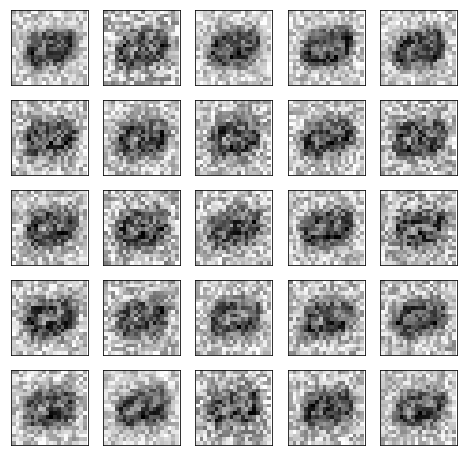

In [422]:
## ================= Part 9: Visualize Weights =================
#  You can now "visualize" what the neural network is learning by 
#  displaying the hidden units to see what features they are capturing in 
#  the data.
import importlib
importlib.reload(libplt)
print('\nVisualizing Neural Network... \n')

libplt.displayData(Theta1[:, 1:])

# 10. 实现预测

In [409]:
def predict(Theta1, Theta2, X):
    #PREDICT Predict the label of an input given a trained neural network
    #   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
    #   trained weights of a neural network (Theta1, Theta2)

    # Useful values
    m = len(X);
    num_labels = len(Theta2);
    
    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)),X))

    # You need to return the following variables correctly 
    p = np.zeros((len(X), 1));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned neural network. You should set p to a 
    #               vector containing labels between 1 to num_labels.
    #
    # Hint: The max function might come in useful. In particular, the max
    #       function can also return the index of the max element, for more
    #       information see 'help max'. If your examples are in rows, then, you
    #       can use max(A, [], 2) to obtain the max for each row.
    #
    h1 = sigmoid(np.dot(X,Theta1.T))
    #print(h1.shape)
    #print(Theta2.shape[1])
    h1 = np.column_stack((np.ones((h1.shape[0],1)),h1))
    h2 = sigmoid(np.dot(h1,Theta2.T))
    p = np.argmax(h2, axis = 1) #p: 5000*10
    #print(p)
    p=p+1
    return p

   # =========================================================================


In [423]:
## ================= Part 10: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)
compare = np.column_stack((pred,y))
print(compare)
print('\nTraining Set Accuracy: %f\n'%(np.mean(np.double(pred == y)) * 100))

[[ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 [ 8 10]
 


Training Set Accuracy: 10.000000



In [427]:
Theta1

array([[  3.31622172e-01,   1.97103776e-03,   8.10519686e-04,
          1.91028321e-03,   1.21881824e-03,   1.88772219e-03,
          2.60004411e-04,   1.22330926e-04,   1.84670434e-03,
          1.36835242e-03,   3.85368657e-04,   8.55875061e-04,
          1.97301672e-04,   1.56623436e-04,   8.97588185e-04,
          1.71474344e-03,   1.20575257e-03,   1.16199354e-03,
          1.53045925e-04,   7.62105132e-04,   1.98405355e-03,
          1.03507447e-03,   1.81101066e-04,   1.79892936e-03,
          4.70934566e-04,   3.03543898e-06,   1.90607537e-03,
          2.03329901e-03,   1.59876083e-03,   1.43629678e-03,
          4.11821785e-04,   1.96057304e-03,   3.28322911e-04,
          1.59359679e-05,   5.82107090e-04,   1.03654768e-03,
          1.06524220e-03,   6.75241355e-04,   1.09304450e-03,
          3.69670112e-04,   8.38143868e-04,   6.79192438e-04,
          4.22914757e-04,   1.98866678e-04,   1.86662086e-03,
          1.55309534e-03,   1.35001690e-03,   2.10627174e-03,
        

In [426]:
Theta2

array([[-0.11281568, -0.0877481 , -0.1034231 , -0.08957631, -0.08327914,
        -0.08005016, -0.09684729, -0.09832672, -0.10383514, -0.09402074,
        -0.09727363, -0.0963971 , -0.09680736, -0.09595354, -0.09016542,
        -0.09301135, -0.08527526, -0.09430996, -0.09330469, -0.0981456 ,
        -0.10209056, -0.09375059, -0.08019439, -0.1015127 , -0.09550399,
        -0.09754345],
       [-0.43282573, -0.05678705, -0.06927982, -0.05726719, -0.05071081,
        -0.04880951, -0.06275262, -0.06390821, -0.06769738, -0.06056412,
        -0.06424568, -0.06266683, -0.06199481, -0.06390958, -0.05702236,
        -0.0611331 , -0.05171281, -0.06044248, -0.06000671, -0.06367236,
        -0.06735402, -0.05915409, -0.04781079, -0.06831751, -0.0627743 ,
        -0.06388929],
       [-0.00299928, -0.10350807, -0.12212297, -0.10502894, -0.09610759,
        -0.09449254, -0.11359431, -0.11545578, -0.12144463, -0.1105204 ,
        -0.11446926, -0.11284194, -0.11291698, -0.11452962, -0.10603795,
       